In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install osmnx
!pip install osmnx geopandas pandas matplotlib


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [2]:
import numpy as np
from scipy.spatial import cKDTree

Loadng data for Task 3
==

In [3]:
import matplotlib.pyplot as plt
import osmnx as ox
# Define the city name
city_name = "Porto, Portugal"

# Download the road network data for driving routes
road_network = ox.graph_from_place(city_name, network_type='drive')
# Load the road network as a GeoDataFrame
gdf_network = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
# Reproject the GPS and road network to a projected CRS (e.g., UTM zone 29N)
def reproject_to_meters(gdf, crs="EPSG:32629"):  # UTM zone 29N
    return gdf.to_crs(crs)

# Reproject road network to UTM
gdf_network = reproject_to_meters(gdf_network)

In [4]:
gdf_network.head(10)

osmid  oneway   lanes  \
u        v          key                                                       
25503936 4722746638 0                             479127843    True       2   
         281726624  0                 [4256507, 1175924414]    True       1   
25503951 1243857957 0                               4256513    True       1   
         4507024043 0                             158906049    True       1   
25504027 1243857999 0       [4256491, 108390772, 479127839]    True       2   
25504163 25504183   0                [479198379, 479198374]    True       3   
25504183 2486710630 0    [479198378, 427967026, 1189270215]    True       4   
25507552 413275483  0                  [35006698, 34711004]    True       3   
         409114759  0      [34884993, 480148036, 497147261]    True  [2, 1]   
25507559 1731168926 0                             480148045    True       3   

                               highway  maxspeed reversed   length  \
u        v          key                                              
25503936 4722746638 0    motorway_link        70    False   32.388   
         281726624  0    motorway_link        40    False  223.005   
25503951 1243857957 0    motorway_link        40    False  112.268   
         4507024043 0    motorway_link        40    False  191.892   
25504027 1243857999 0    motorway_link        70    False  118.915   
25504163 25504183   0            trunk        90    False   77.190   
25504183 2486710630 0            trunk        90    False  272.903   
25507552 413275483  0         motorway        80    False  560.140   
         409114759  0    motorway_link  [40, 50]    False  283.215   
25507559 1731168926 0         motorway        80    False  321.704   

                                                                  geometry  \
u        v          key                                                      
25503936 4722746638 0    LINESTRING (530147.069 4557255.051, 530123.905...   
         281726624  0    LINESTRING (530147.069 4557255.051, 530139.974...   
25503951 1243857957 0    LINESTRING (530027.896 4557507.196, 530003.273...   
         4507024043 0    LINESTRING (530027.896 4557507.196, 530012.797...   
25504027 1243857999 0    LINESTRING (530066.976 4557345.086, 530054.509...   
25504163 25504183   0    LINESTRING (531672.509 4558167.458, 531670.228...   
25504183 2486710630 0    LINESTRING (531668.946 4558244.432, 531669.903...   
25507552 413275483  0    LINESTRING (534934.441 4557295.224, 534953.720...   
         409114759  0    LINESTRING (534934.441 4557295.224, 534955.523...   
25507559 1731168926 0    LINESTRING (535147.006 4556892.769, 535143.479...   

                                          ref bridge                    name  \
u        v          key                                                        
25503936 4722746638 0                     NaN    NaN                     NaN   
         281726624  0                     NaN    NaN                     NaN   
25503951 1243857957 0                    IC 1    NaN                     NaN   
         4507024043 0                     NaN    NaN                     NaN   
25504027 1243857999 0                     NaN    yes                     NaN   
25504163 25504183   0    [EN 14, EN 14;EN 13]    NaN               Via Norte   
25504183 2486710630 0    [EN 14, EN 14;EN 13]    NaN               Via Norte   
25507552 413275483  0         A 20;IP 1;IC 23    yes  Via de Cintura Interna   
         409114759  0                     NaN    yes                     NaN   
25507559 1731168926 0         A 20;IP 1;IC 23    yes  Via de Cintura Interna   

                        access width junction tunnel  
u        v          key                               
25503936 4722746638 0      NaN   NaN      NaN    NaN  
         281726624  0      NaN   NaN      NaN    NaN  
25503951 1243857957 0      NaN   NaN      NaN    NaN  
         4507024043 0      NaN   NaN      NaN    NaN  
25504027 1243857999 0      NaN   NaN

In [5]:
#import pandas as pd
import pandas as pd

# Define the path to the zip file in Google Drive
file_path = '/content/drive/MyDrive/gps_data_with_outliers.csv'


# Example for loading the first 1500 trips from train.csv
gps_data_with_outliers = pd.read_csv(file_path)

# Check if data is now populated
# Remove the 'LOF_Score' column

# Verify the result by printing the first few rows
gps_data_with_outliers.head(10)



,TRIP_ID,lon,lat,Is it an outlier,Adjacent Distance
0,1372636858620000589,-8.618643,41.141412,Not outlier,0.000000
1,1372636858620000589,-8.618499,41.141376,Not outlier,0.012733
2,1372636858620000589,-8.620326,41.142510,Not outlier,0.198462
3,1372636858620000589,-8.622153,41.143815,Not outlier,0.211022
4,1372636858620000589,-8.623953,41.144373,Not outlier,0.163326
5,1372636858620000589,-8.626680,41.144778,Not outlier,0.233311
6,1372636858620000589,-8.627373,41.144697,Not outlier,0.058869
7,1372636858620000589,-8.630226,41.145210,Not outlier,0.246194
8,1372636858620000589,-8.632746,41.146920,Not outlier,0.284287
9,1372636858620000589,-8.631738,41.148225,Not outlier,0.167824


Snapping to closest point using Smallest Euclidean Distance
==

In [14]:
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
# Define the city name
#gps_data_with_outliers[gps_data_with_outliers['Is it an outlier'] == 'Not outlier']
euDistance_gps = gpd.GeoDataFrame(gps_data_with_outliers, geometry=gpd.points_from_xy(gps_data_with_outliers.lon, gps_data_with_outliers.lat), crs="EPSG:4326")

# Reproject GPS points to UTM
euDistance_gps = reproject_to_meters(euDistance_gps)


# Function to snap GPS points to the nearest road segment
def snap_to_nearest_road(gps_gdf, road_gdf):
    snapped_points = []
    osmids = []  # To store the nearest road segment IDs

    # Iterate through each GPS point with a progress bar
    for _, point in tqdm(gps_gdf.iterrows(), total=len(gps_gdf), desc="Snapping Points"):
        # Find the nearest road segment by measuring the distance from the point
        road_distances = road_gdf.distance(point.geometry)
        nearest_road_idx = road_distances.idxmin()
        nearest_road = road_gdf.loc[nearest_road_idx]

        # Get the nearest point on the road line
        nearest_point_on_road = nearest_road.geometry.interpolate(
            nearest_road.geometry.project(point.geometry))

            # Get the osmid (road segment ID), ensuring it is always a list
        if isinstance(nearest_road['osmid'], list):
            segment_id = nearest_road['osmid']
        else:
            segment_id = [nearest_road['osmid']]  # Store osmid as a list for consistency

        # Store the snapped point and the road segment ID (`osmid`)
        snapped_points.append(nearest_point_on_road)
        osmids.append(segment_id)

    # Add snapped points and `osmid` to the GeoDataFrame
    gps_gdf['snapped'] = snapped_points
    gps_gdf['osmid'] = osmids
    return gps_gdf






In [15]:
gps_data_with_nearest_osmid_euDist= snap_to_nearest_road(euDistance_gps, gdf_network)
gps_data_with_nearest_osmid_euDist.to_csv('gps_data_with_nearest_osmid_euDist.csv', index=False)
# Verify the output
gps_data_with_nearest_osmid_euDist.head(10)

Snapping Points: 100%|██████████| 71697/71697 [14:26<00:00, 82.71it/s]


,TRIP_ID,lon,lat,Is it an outlier,Adjacent Distance,geometry,snapped,osmid
0,1372636858620000589,-8.618643,41.141412,Not outlier,0.000000,POINT (532004.093 4554525.403),POINT (532006.6420409988 4554529.700701844),[96151239]
1,1372636858620000589,-8.618499,41.141376,Not outlier,0.012733,POINT (532016.195 4554521.460),POINT (532017.3250766147 4554523.364391892),[96151239]
2,1372636858620000589,-8.620326,41.142510,Not outlier,0.198462,POINT (531862.321 4554646.678),POINT (531864.7679670007 4554649.398601944),[96151239]
3,1372636858620000589,-8.622153,41.143815,Not outlier,0.211022,POINT (531708.370 4554790.882),POINT (531708.1408667619 4554790.3814783795),[96151239]
4,1372636858620000589,-8.623953,41.144373,Not outlier,0.163326,POINT (531557.049 4554852.174),POINT (531557.3786611913 4554852.992822166),[28193999]
5,1372636858620000589,-8.626680,41.144778,Not outlier,0.233311,POINT (531328.012 4554896.149),POINT (531328.3645785992 4554892.788091596),[28193999]
6,1372636858620000589,-8.627373,41.144697,Not outlier,0.058869,POINT (531269.896 4554886.908),POINT (531270.0079445827 4554885.685735138),"[759298060, 12298717, 1165288341, 28193999]"
7,1372636858620000589,-8.630226,41.145210,Not outlier,0.246194,POINT (531030.237 4554942.837),POINT (531033.2455236932 4554946.903928638),"[759298060, 12298717, 1165288341, 28193999]"
8,1372636858620000589,-8.632746,41.146920,Not outlier,0.284287,POINT (530817.966 4555131.774),POINT (530815.9148382054 4555128.974716315),[13277357]
9,1372636858620000589,-8.631738,41.148225,Not outlier,0.167824,POINT (530901.939 4555277.002),POINT (530900.9971704344 4555277.625561854),[26119992]


Snapping to closest point using k-d tree
==

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import matplotlib.pyplot as plt


def snap_to_cKDtree_nearest_road(gps_gdf, road_gdf):
    '''
    Aligns each GPS point to its nearest point on the road network using cKDtree
    '''
    # Get the centroids of each road segment and build a KDTree for fast nearest-neighbor lookup
    road_centroids = np.array([(geom.centroid.x, geom.centroid.y) for geom in road_gdf.geometry])
    tree = cKDTree(road_centroids)
    snapped_points = []
    osmids = []  # To store the nearest road segment IDs

    # Iterate through each GPS point with a progress bar
    for _, point in tqdm(gps_gdf.iterrows(), total=len(gps_gdf), desc="Snapping Points"):
        point_coords = (point.geometry.x, point.geometry.y)
        # Find the nearest road segment using the KDTree
        _, nearest_idx = tree.query(point_coords)
        nearest_road = road_gdf.iloc[nearest_idx]
        # Get the nearest point on the road line
        nearest_point_on_road = nearest_road.geometry.interpolate(
            nearest_road.geometry.project(point.geometry))

            # Get the osmid (road segment ID), ensuring it is always a list
        if isinstance(nearest_road['osmid'], list):
            segment_id = nearest_road['osmid']
        else:
            segment_id = [nearest_road['osmid']]  # Store osmid as a list for consistency

        # Store the snapped point and the road segment ID (`osmid`)
        snapped_points.append(nearest_point_on_road)
        osmids.append(segment_id)

    # Add snapped points and `osmid` to the GeoDataFrame
    gps_gdf['snapped'] = snapped_points
    gps_gdf['osmid'] = osmids
    return gps_gdf


gdf_gps_kdtree_snap = gpd.GeoDataFrame(gps_data_with_outliers, geometry=gpd.points_from_xy(gps_data_with_outliers.lon, gps_data_with_outliers.lat), crs="EPSG:4326")
# Reproject GPS points to UTM
gdf_gps_kdtree_snap = reproject_to_meters(gdf_gps_kdtree_snap)

# Save the filtered data to a CSV
gdf_gps_kdtree_snap.to_csv('gdf_gps_kdtree_snap.csv', index=False)

gdf_gps_kdtree_snap.head(10)


,TRIP_ID,lon,lat,Is it an outlier,Adjacent Distance,geometry
0,1372636858620000589,-8.618643,41.141412,Not outlier,0.000000,POINT (532004.093 4554525.403)
1,1372636858620000589,-8.618499,41.141376,Not outlier,0.012733,POINT (532016.195 4554521.460)
2,1372636858620000589,-8.620326,41.142510,Not outlier,0.198462,POINT (531862.321 4554646.678)
3,1372636858620000589,-8.622153,41.143815,Not outlier,0.211022,POINT (531708.370 4554790.882)
4,1372636858620000589,-8.623953,41.144373,Not outlier,0.163326,POINT (531557.049 4554852.174)
5,1372636858620000589,-8.626680,41.144778,Not outlier,0.233311,POINT (531328.012 4554896.149)
6,1372636858620000589,-8.627373,41.144697,Not outlier,0.058869,POINT (531269.896 4554886.908)
7,1372636858620000589,-8.630226,41.145210,Not outlier,0.246194,POINT (531030.237 4554942.837)
8,1372636858620000589,-8.632746,41.146920,Not outlier,0.284287,POINT (530817.966 4555131.774)
9,1372636858620000589,-8.631738,41.148225,Not outlier,0.167824,POINT (530901.939 4555277.002)


In [ ]:
# Perform the snapping process
gps_data_with_nearest_osmid_kdtree = snap_to_cKDtree_nearest_road(gdf_gps_kdtree_snap, gdf_network)
gps_data_with_nearest_osmid_kdtree.head(10)
gps_data_with_nearest_osmid_kdtree.to_csv('gps_data_with_nearest_osmid_kdtree.csv', index=False)


Snapping Points: 100%|██████████| 71697/71697 [00:38<00:00, 1862.38it/s]


Task 4 Euclidean Distance
==

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
    '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
]

# List of the 15 trip IDs you want to visualize
tripids = [
    1372636858620000589, 1372637303620000596, 1372636951620000320,
    1372636854620000520, 1372637091620000337, 1372636965620000231,
    1372637210620000456, 1372637299620000011, 1372637274620000403,
    1372637905620000320, 1372636875620000233, 1372637984620000520,
    1372637343620000571, 1372638595620000233, 1372638151620000231
]

# Step 1: Create LineStrings for each trip
def create_mapped_routes(filtered_data):
    routes = []

    # Filter the snapped data to include only 'Is it an outlier' == 'Not outlier'

    # Filter to include only the specified trip IDs
    unique_trip_ids = filtered_data[filtered_data['TRIP_ID'].isin(tripids)]['TRIP_ID'].unique()

    print(f"Filtered trips with 'Not outlier': {len(filtered_data)}")  # Debugging line

    # Group snapped points by TRIP_ID
    for trip_id, group in filtered_data.groupby('TRIP_ID'):
        if trip_id in unique_trip_ids:
            # Create a LineString from the snapped points
            snapped_points = list(group['snapped'])
            if len(snapped_points) > 1:  # Only create a route if there are multiple points
                route = LineString(snapped_points)
                routes.append({'TRIP_ID': trip_id, 'geometry': route})

    # Convert to GeoDataFrame
    mapped_routes = gpd.GeoDataFrame(routes, crs="EPSG:32629")

    # Check the CRS and ensure the data is valid
    print(f"Mapped Routes CRS: {mapped_routes.crs}")  # Debugging line
    print(f"Number of routes created: {len(mapped_routes)}")  # Debugging line

    return mapped_routes

# Create mapped routes GeoDataFrame for the specified trips (non-outliers only)
mapped_routes = create_mapped_routes(gps_data_with_nearest_osmid_euDist)

# Step 2: Order the mapped routes based on the provided trip_ids
mapped_routes['TRIP_ID'] = pd.Categorical(mapped_routes['TRIP_ID'], categories=tripids, ordered=True)
mapped_routes = mapped_routes.sort_values('TRIP_ID')

# Step 3: Plot Mapped Routes with Distinct Colors
def plot_colored_mapped_routes(mapped_routes, road_network,titlestring):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network
    road_network.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

    # Create legend handles to map each color to the corresponding trip ID
    legend_handles = []

    for i, trip_id in enumerate(mapped_routes['TRIP_ID'].unique()):
        route = mapped_routes[mapped_routes['TRIP_ID'] == trip_id]
        route_color = custom_colors[i]  # Get the color corresponding to the trip_id

        if not route.empty:
            # Plot the route with the assigned color
            route.plot(ax=ax, color=route_color, linewidth=3, alpha=0.9, label=f'Trip {i + 1}')

            # Create a dummy handle for the legend (to add the trip label with its color)
            legend_handles.append(plt.Line2D([0], [0], color=route_color, lw=4, label=f'Trip {i + 1}'))

    # Customize plot
    plt.legend(title="Trips", loc='upper right', fontsize='small', ncol=2)
    plt.title("Mapped Routes for the first 15 Trip IDs on Porto Road Network "+titlestring)
    plt.show()

# Run the function to visualize routes by trip with distinct colors
plot_colored_mapped_routes(mapped_routes, gdf_network,'by nearest Euclidean Distance')


Filtered trips with 'Not outlier': 71697


ValueError: could not convert string to float: 'P'

Task 4 kd-tree
==

Filtered trips with 'Not outlier': 71697
Mapped Routes CRS: EPSG:32629
Number of routes created: 15


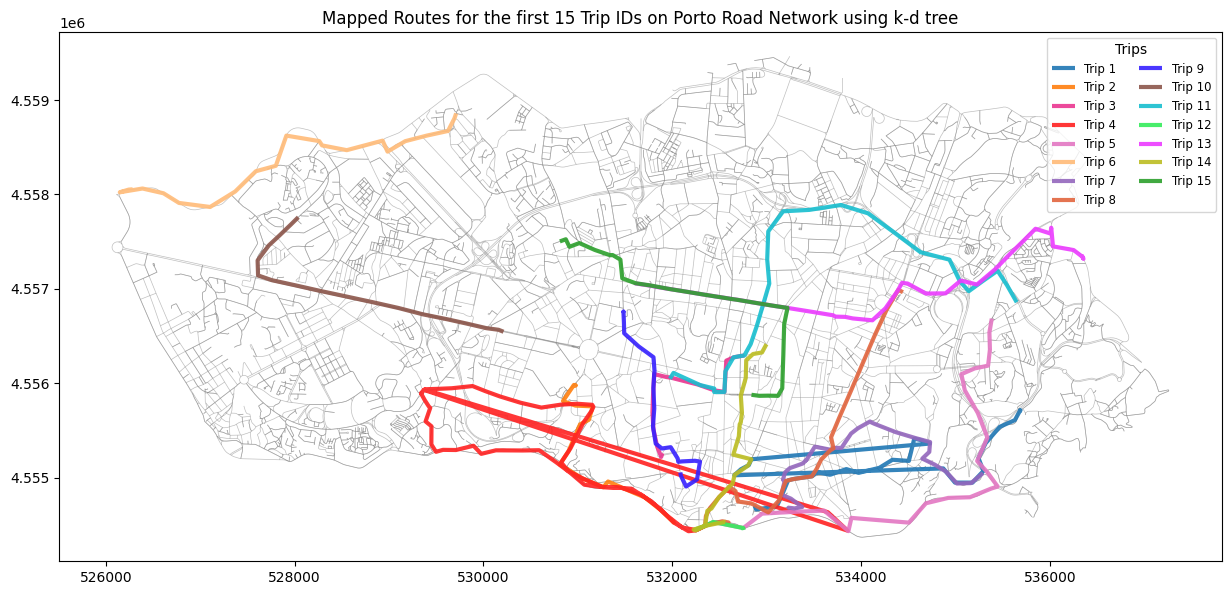

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point
from tqdm import tqdm


# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
    '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
]

# List of the 15 trip IDs you want to visualize
tripids = [
    1372636858620000589, 1372637303620000596, 1372636951620000320,
    1372636854620000520, 1372637091620000337, 1372636965620000231,
    1372637210620000456, 1372637299620000011, 1372637274620000403,
    1372637905620000320, 1372636875620000233, 1372637984620000520,
    1372637343620000571, 1372638595620000233, 1372638151620000231
]


# Step 2: Create mapped routes GeoDataFrame for the specified trips (non-outliers only)
mapped_routes_kd = create_mapped_routes(gps_data_with_nearest_osmid_kdtree)

# Ensure both road network and snapped data are in the same CRS
gdf_network = gdf_network.to_crs("EPSG:32629")

# Step 3: Order the mapped routes based on the provided trip_ids
mapped_routes['TRIP_ID'] = pd.Categorical(mapped_routes['TRIP_ID'], categories=tripids, ordered=True)
mapped_routes = mapped_routes.sort_values('TRIP_ID')

# Run the function to visualize routes by trip with distinct colors
plot_colored_mapped_routes(mapped_routes_kd, gdf_network,'using k-d tree')


In [ ]:
trip_segment_kdtree_pertrip = gps_data_with_nearest_osmid_kdtree.groupby('TRIP_ID')['osmid'].apply(list).reset_index(name='SEGMENT_IDS')


trip_segment_kdtree_pertrip.head(10)

,TRIP_ID,SEGMENT_IDS
0,1372636853620000380,"[[31572903], [31572903], [31572903], [22690804..."
1,1372636854620000520,"[[859507145], [859507145], [859507145], [85950..."
2,1372636858620000589,"[[96151239], [96151239], [167487529], [9615123..."
3,1372636875620000233,"[[608421700], [233055818, 95841157, 1174835645..."
4,1372636896620000360,"[[14326493], [14326493], [14326493], [69759802..."
5,1372636951620000320,"[[226908049], [226908049], [420021609], [74366..."
6,1372636956620000167,"[[800460939], [734630278], [734630278], [89305..."
7,1372636965620000231,"[[759298059], [743663937, 1192211890], [226908..."
8,1372637072620000367,"[[51230332], [14326493], [14326493], [10074417..."
9,1372637084620000285,"[[859507142], [859507142], [1014581368], [4348..."


<ipython-input-44-dbae9678667e>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return [cm.get_cmap('tab20', num_colors)(i) for i in range(num_colors)]


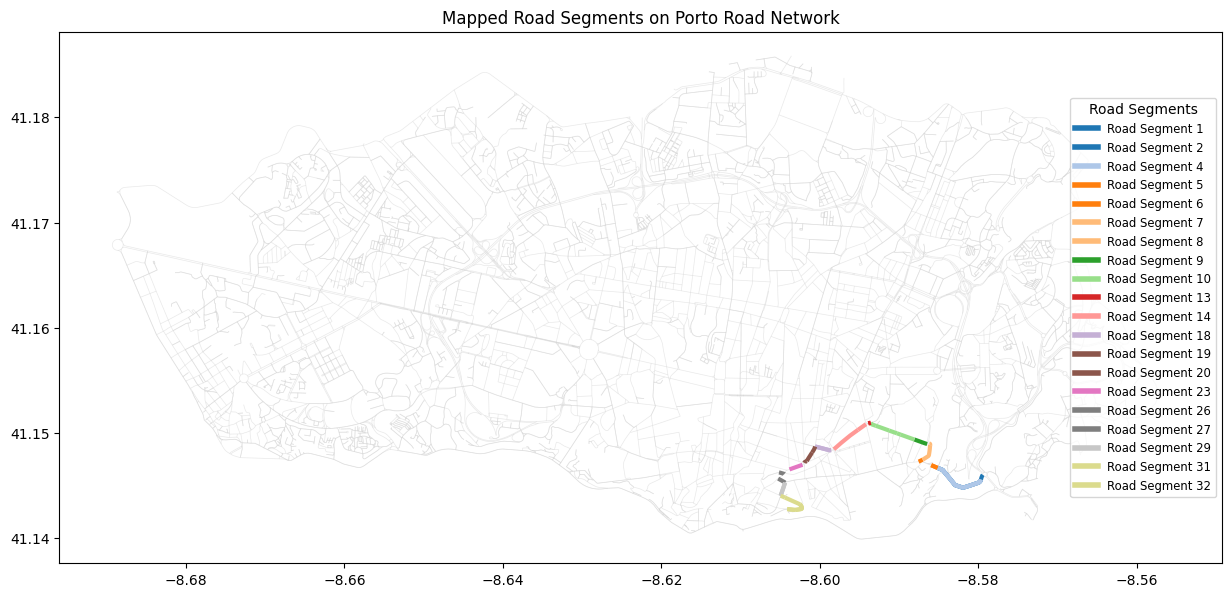

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import osmnx as ox
import geopandas as gpd
import itertools

# Generate a dynamic color palette based on the number of road segments
def generate_colors(num_colors):
    # Using 'tab20' colormap to ensure good variety in colors, can change to other colormaps
    return [cm.get_cmap('tab20', num_colors)(i) for i in range(num_colors)]

# Function to plot road segments
def plot_top_duration_road_segments(gdf_network, osmids_to_visualize):
    legend_handles = []
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network (light gray for background)
    gdf_network.plot(ax=ax, linewidth=0.5, color='lightgray', alpha=0.5)

    # Generate colors based on the number of segments in osmids_to_visualize
    custom_colors = generate_colors(len(osmids_to_visualize))

    # Loop through the osmids_to_visualize list and plot each road segment
    for i, segment_list in enumerate(osmids_to_visualize):
        road_color = custom_colors[i]  # Select color for each segment

        # For each road segment in the segment list, treat as one road segment
        osmid_combined = tuple(segment_list)  # Combine OSM IDs into a tuple

        # Check if segment has already been plotted (to avoid adding it again)
        if osmid_combined not in [handle[0] for handle in legend_handles]:
            # Filter the road network by the current OSM ID
            road_segment = gdf_network[gdf_network['osmid'].apply(lambda x: set(segment_list).issubset(x) if isinstance(x, list) else x == segment_list[0])]

            if not road_segment.empty:
                # Plot the road segment with the selected color
                road_segment.plot(ax=ax, color=road_color, linewidth=3, label=f'Road Segment {i + 1}')

                # Add a dummy legend handle only once
                legend_handles.append((osmid_combined, plt.Line2D([0], [0], color=road_color, lw=4, label=f'Road Segment {i + 1}')))

    # Customize the plot with the legend and title
    plt.legend(handles=[handle[1] for handle in legend_handles], title="Road Segments", loc='center right', fontsize='small', ncol=1)
    plt.title("Mapped Road Segments on Porto Road Network")
    plt.show()

# Assuming gdf_network is the GeoDataFrame containing the road network
road_network = ox.graph_from_place("Porto, Portugal", network_type="drive")
gdf_network = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# Replace the example segment_group_list with your actual data
segment_group_list = [[332348178], [35331288, 1137633273], [35331288, 1137633273], [35331288], [35331594, 35331293, 35331294], [859507143], [434897752, 1016528107, 1226233909], [859507142], [125513761], [207634521], [207634521], [207634521], [1177120140], [391839901], [391839901], [391839901], [391839901], [8367103], [34916303], [1174855827], [1174855827], [1174855827], [1174855824, 14327545, 1174835643], [1174855824, 14327545, 1174835643], [1174855824, 14327545, 1174835643], [213577453], [14327438], [14327438], [1172531961, 30417987], [1172531961, 30417987], [14327318], [211656637], [211656637], [211656637], [211656637], [211656637]]

# Run the function to visualize all road segments
plot_top_duration_road_segments(gdf_network, segment_group_list)


Continue from Task 3
==

In [16]:
trip_segment_euclidean_pertrip = gps_data_with_nearest_osmid_euDist.groupby('TRIP_ID')['osmid'].apply(list).reset_index(name='SEGMENT_IDS')

trip_segment_euclidean_pertrip.to_csv('trip_segment_euclidean_pertrip.csv', index=False)
trip_segment_euclidean_pertrip.head(10)

,TRIP_ID,SEGMENT_IDS
0,1372636853620000380,"[[743663936, 12544650, 1335691898, 13278159], ..."
1,1372636854620000520,"[[859507145], [859507145], [859507145], [85950..."
2,1372636858620000589,"[[96151239], [96151239], [96151239], [96151239..."
3,1372636875620000233,"[[608421700], [1085592953], [1085592953], [595..."
4,1372636896620000360,"[[14326493], [14326493], [14326493], [69759802..."
5,1372636951620000320,"[[226908049], [226908049], [743663937, 1192211..."
6,1372636956620000167,"[[800460939], [734630278], [734630278], [64260..."
7,1372636965620000231,"[[759298059], [743663937, 1192211890], [743663..."
8,1372637072620000367,"[[14326493], [14326493], [14326493], [83800017..."
9,1372637084620000285,"[[434897752, 1016528107, 1226233909], [8595071..."


Task 5 part 1
==

In [ ]:
def remove_consecutive_duplicates(elements):
    """
    Removes consecutive duplicate elements from a list of lists.
    """
    if not elements:
        return []

    # Start with the first element
    result = []
    result.append(tuple(elements[0]))

    # Iterate through the list starting from the second element

    for current in elements[1:]:
        current = tuple(current)

        if current != result[-1]:  # Compare directly without converting to tuple
            result.append(current)

    return result


trip_segment_euclidean_pertrip_no_duplicates=trip_segment_euclidean_pertrip
trip_segment_euclidean_pertrip_no_duplicates['SEGMENT_IDS_no_Duplicates'] = trip_segment_euclidean_pertrip_no_duplicates.SEGMENT_IDS.apply(remove_consecutive_duplicates)
trip_segment_euclidean_pertrip_no_duplicates.to_csv('trip_segment_euclidean_pertrip_no_duplicates.csv', index=False)
trip_segment_euclidean_pertrip_no_duplicates.head(10)

,TRIP_ID,SEGMENT_IDS,SEGMENT_IDS_no_Duplicates
0,1372636853620000380,"[[743663936, 12544650, 1335691898, 13278159], ...","[(743663936, 12544650, 1335691898, 13278159), ..."
1,1372636854620000520,"[[859507145], [859507145], [859507145], [85950...","[(859507145,), (12543986,), (859507144,), (353..."
2,1372636858620000589,"[[96151239], [96151239], [96151239], [96151239...","[(96151239,), (28193999,), (759298060, 1229871..."
3,1372636875620000233,"[[608421700], [1085592953], [1085592953], [595...","[(608421700,), (1085592953,), (595164143,), (8..."
4,1372636896620000360,"[[14326493], [14326493], [14326493], [69759802...","[(14326493,), (697598025, 14326493, 211436103)..."
5,1372636951620000320,"[[226908049], [226908049], [743663937, 1192211...","[(226908049,), (743663937, 1192211890), (75929..."
6,1372636956620000167,"[[800460939], [734630278], [734630278], [64260...","[(800460939,), (734630278,), (642609452,), (49..."
7,1372636965620000231,"[[759298059], [743663937, 1192211890], [743663...","[(759298059,), (743663937, 1192211890), (74366..."
8,1372637072620000367,"[[14326493], [14326493], [14326493], [83800017...","[(14326493,), (838000172,), (14326493,), (6975..."
9,1372637084620000285,"[[434897752, 1016528107, 1226233909], [8595071...","[(434897752, 1016528107, 1226233909), (8595071..."


In [ ]:
#trip_segment_euDist_no_outlier_no_duplicates['new'] = trip_segment_euDist_no_outlier_no_duplicates.SEGMENT_IDS.apply(lambda x: list(set([tuple(i) for i in x])))
from collections import Counter

combined_list = [item for sublist in trip_segment_euclidean_pertrip_no_duplicates['SEGMENT_IDS_no_Duplicates'] for item in sublist]

# Count occurrences using Counter
group_counts = Counter(combined_list)

# Convert Counter result to DataFrame
df_counts = pd.DataFrame(group_counts.items(), columns=['Segment_Group', 'Count'])
df_counts['Segment_Group'] = df_counts['Segment_Group'].apply(list)
df_counts.sort_values('Count', ascending = False, inplace = True)
df_counts.to_csv('top10_most_traversed.csv', index=False)
df_counts.head(10)

,Segment_Group,Count
264,[1016542178],201
19,"[434897752, 1016528107, 1226233909]",176
153,[838000172],170
74,[190128487],147
6,"[715176795, 1184851191]",129
70,[36748084],128
570,"[434860177, 1174835646]",122
516,[287648900],118
374,"[398035553, 453763721, 663351958, 1171297150]",117
184,[859507142],117


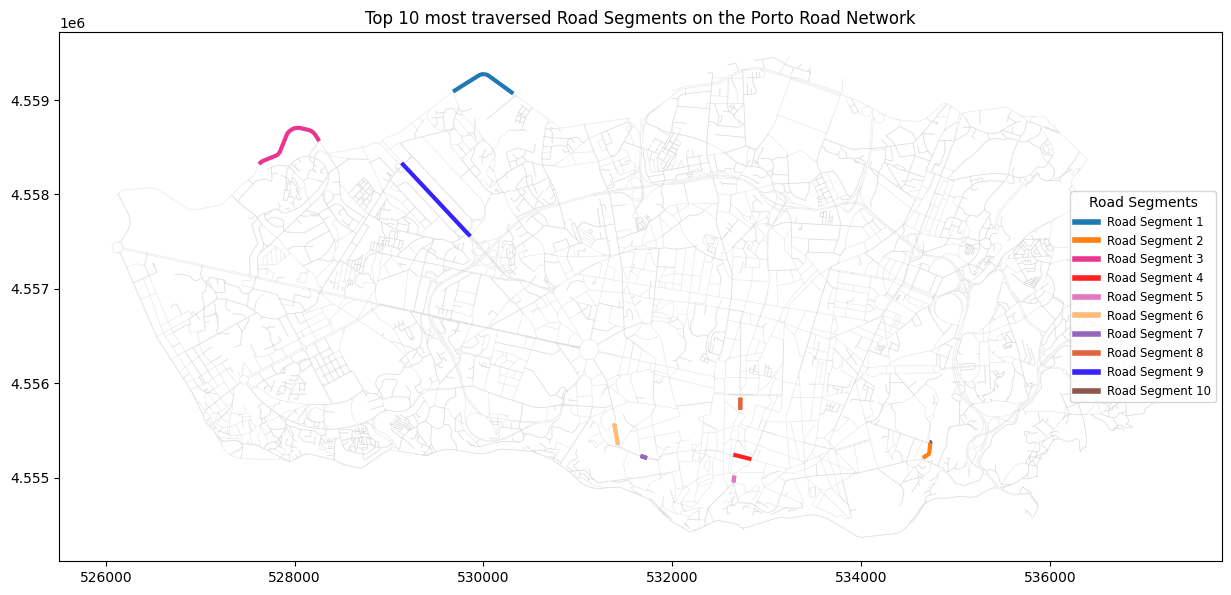

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b'
]

segment_group_list = df_counts['Segment_Group'].head(10).tolist()


# Function to filter and plot the road segments
def plot_top_road_segments(gdf_network, osmids_to_visualize):
    legend_handles = []
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network (light gray for background)
    gdf_network.plot(ax=ax, linewidth=0.5, color='lightgray', alpha=0.5)

    # Loop through the osmids_to_visualize list and plot each road segment
    for i, segment_list in enumerate(osmids_to_visualize):
        # For each road segment in the segment list, treat as one road segment
        osmid_combined = tuple(segment_list)  # Combine OSM IDs into a tuple

        # Check if segment has already been plotted (to avoid adding it again)
        if osmid_combined not in [handle[0] for handle in legend_handles]:
            # Filter the road network by the current OSM ID
            road_segment = gdf_network[gdf_network['osmid'].apply(lambda x: set(segment_list).issubset(x) if isinstance(x, list) else x == segment_list[0])]

            if not road_segment.empty:
                # Plot the road segment with the selected color
                road_segment.plot(ax=ax, color=custom_colors[i], linewidth=3, label=f'Road Segment {i + 1}')

                # Add a dummy legend handle only once
                legend_handles.append((osmid_combined, plt.Line2D([0], [0], color=custom_colors[i], lw=4, label=f'Road Segment {i + 1}')))

    # Customize the plot with the legend and title
    plt.legend(handles=[handle[1] for handle in legend_handles], title="Road Segments", loc='center right', fontsize='small', ncol=1)
    plt.title("Top 10 most traversed Road Segments on the Porto Road Network")
    plt.show()
segment_group_list = df_counts['Segment_Group'].head(10).tolist()

# Assuming gdf_network is the GeoDataFrame containing the road network
road_network = ox.graph_from_place("Porto, Portugal", network_type="drive")
gdf_network = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
gdf_network = reproject_to_meters(gdf_network)

# Run the function to visualize the top road segments
plot_top_road_segments(gdf_network, segment_group_list)


Task 5 part 2 longest AVERAGE time spent on that road segment
==

In [24]:
import pandas as pd
from collections import Counter

def convert_seconds_to_time(seconds):
    """Convert seconds to 'hours minutes seconds' format."""
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{minutes} minutes, {seconds} seconds"

def calculate_segment_statistics(trip_segment_data):
    # Prepare an empty list to store results
    segment_statistics = []

    # Track the total occurrences of each segment and which trips it appears in
    segment_counts = Counter()
    unique_trips_per_segment = {}

    # Iterate over each trip in the data
    for idx, row in trip_segment_data.iterrows():
        trip_id = row['TRIP_ID']
        segment_ids = row['SEGMENT_IDS']

        # Track the occurrence of each segment in the current trip
        for segment_list in segment_ids:
            segment_tuple = tuple(segment_list)  # Convert segment list to a tuple for consistency

            # Count the total number of appearances
            segment_counts[segment_tuple] += 1

            # Track unique trips where the segment appears
            if segment_tuple not in unique_trips_per_segment:
                unique_trips_per_segment[segment_tuple] = set()
            unique_trips_per_segment[segment_tuple].add(trip_id)

    # Prepare the results
    for segment, total_count in segment_counts.items():
        num_unique_trips = len(unique_trips_per_segment[segment])
        avg_time_seconds = ((total_count -num_unique_trips) / num_unique_trips ) * 15  # Time in seconds

        # Convert to hours, minutes, seconds
        avg_time = convert_seconds_to_time(int(avg_time_seconds))

        # Append the result to the list
        segment_statistics.append({
            'SEGMENT_ID': list(segment),
            'Total_Count': total_count,
            'Number_of_Unique_Trips': num_unique_trips,
            'Average_Seconds_on_Road_Segment': avg_time_seconds,
            'Average_Time_on_Road_Segment': avg_time
        })

    # Convert the results to a DataFrame and sort by 'Total_Count'
    df = pd.DataFrame(segment_statistics)
    df_sorted = df.sort_values(by='Total_Count', ascending=False)

    return df_sorted

# Assuming trip_segment_data is your DataFrame with 'TRIP_ID' and 'SEGMENT_IDS' columns
# Example of the structure:
# trip_segment_data = pd.read_csv("your_file.csv")  # This is how you'd typically load the data

# Get the statistics for each segment
segment_statistics_df = calculate_segment_statistics(trip_segment_euclidean_pertrip)
segment_statistics_df.sort_values('Average_Seconds_on_Road_Segment', ascending = False, inplace = True)

# Save the result to a CSV file
segment_statistics_df.to_csv('task5part2_AVERAGEtime.csv', index=False)

# Output the result in table format
segment_statistics_df.head(10)  # Display the first 10 rows


,SEGMENT_ID,Total_Count,Number_of_Unique_Trips,Average_Seconds_on_Road_Segment,Average_Time_on_Road_Segment
3015,"[128362570, 39895274, 481849357, 480494958, 48...",54,1,795.000000,"13 minutes, 15 seconds"
2987,[134085457],50,1,735.000000,"12 minutes, 15 seconds"
2574,[39911797],32,1,465.000000,"7 minutes, 45 seconds"
2739,[39678582],59,2,427.500000,"7 minutes, 7 seconds"
2510,[8367104],56,2,405.000000,"6 minutes, 45 seconds"
2275,[1308709259],25,1,360.000000,"6 minutes, 0 seconds"
264,[1016542178],4246,183,333.032787,"5 minutes, 33 seconds"
1332,[1172489853],45,2,322.500000,"5 minutes, 22 seconds"
1656,[39977889],45,2,322.500000,"5 minutes, 22 seconds"
1897,[391839899],157,7,321.428571,"5 minutes, 21 seconds"


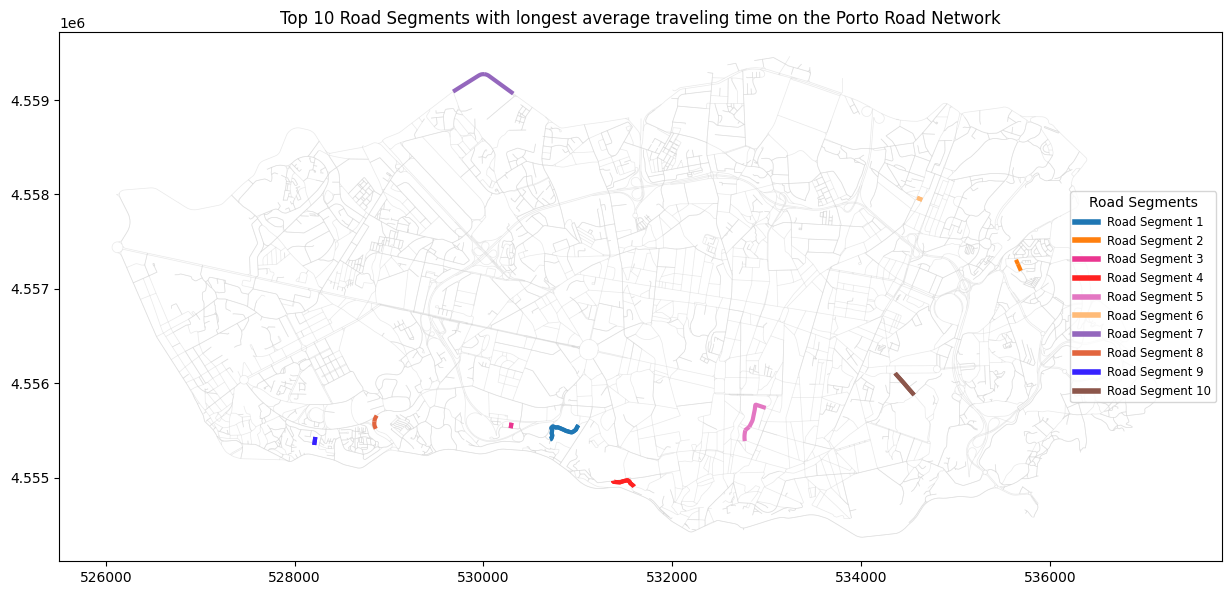

In [27]:
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b'
]



# Function to filter and plot the road segments
def plot_top_duration_road_segments(gdf_network, osmids_to_visualize):
    legend_handles = []
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network (light gray for background)
    gdf_network.plot(ax=ax, linewidth=0.5, color='lightgray', alpha=0.5)

    # Loop through the osmids_to_visualize list and plot each road segment
    for i, segment_list in enumerate(osmids_to_visualize):
        # For each road segment in the segment list, treat as one road segment
        osmid_combined = tuple(segment_list)  # Combine OSM IDs into a tuple

        # Check if segment has already been plotted (to avoid adding it again)
        if osmid_combined not in [handle[0] for handle in legend_handles]:
            # Filter the road network by the current OSM ID
            road_segment = gdf_network[gdf_network['osmid'].apply(lambda x: set(segment_list).issubset(x) if isinstance(x, list) else x == segment_list[0])]

            if not road_segment.empty:
                # Plot the road segment with the selected color
                road_segment.plot(ax=ax, color=custom_colors[i], linewidth=3, label=f'Road Segment {i + 1}')

                # Add a dummy legend handle only once
                legend_handles.append((osmid_combined, plt.Line2D([0], [0], color=custom_colors[i], lw=4, label=f'Road Segment {i + 1}')))

    # Customize the plot with the legend and title
    plt.legend(handles=[handle[1] for handle in legend_handles], title="Road Segments", loc='center right', fontsize='small', ncol=1)
    plt.title("Top 10 Road Segments with longest average traveling time on the Porto Road Network")
    plt.show()

# Assuming gdf_network is the GeoDataFrame containing the road network
road_network = ox.graph_from_place("Porto, Portugal", network_type="drive")
gdf_network = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
gdf_network = reproject_to_meters(gdf_network)
segment_counts_average_duration = segment_statistics_df['SEGMENT_ID'].tolist()[:10]

# Run the function to visualize the top road segments
plot_top_duration_road_segments(gdf_network, segment_counts_average_duration)


Task 6 extended analysis
==

In [ ]:
gps_data_with_nearest_osmid_euDist_no_outliers=gps_data_with_nearest_osmid_euDist[gps_data_with_nearest_osmid_euDist['Is it an outlier'] != 'Outlier'].reset_index(drop=True)
gps_data_with_nearest_osmid_euDist_no_outliers.head(1)

,TRIP_ID,lon,lat,Is it an outlier,Adjacent Distance,geometry,snapped,osmid
0,1372636858620000589,-8.618643,41.141412,Not outlier,0.0,POINT (532004.093 4554525.403),POINT (532006.6420409988 4554529.700701844),[96151239]


Filtered trips with 'Not outlier': 71472
Mapped Routes CRS: EPSG:32629
Number of routes created: 1


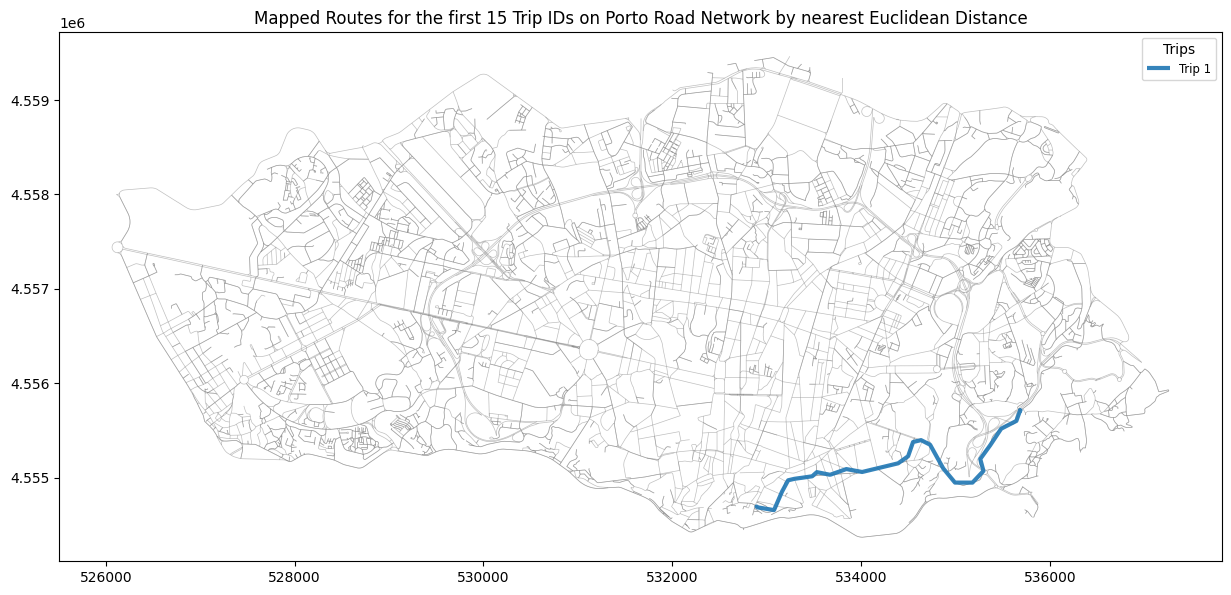

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
    '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
]

# List of the 15 trip IDs you want to visualize
tripids = [
    1372636854620000520
]

# Step 1: Create LineStrings for each trip
def create_mapped_routes(filtered_data):
    routes = []

    # Filter the snapped data to include only 'Is it an outlier' == 'Not outlier'

    # Filter to include only the specified trip IDs
    unique_trip_ids = filtered_data[filtered_data['TRIP_ID'].isin(tripids)]['TRIP_ID'].unique()

    print(f"Filtered trips with 'Not outlier': {len(filtered_data)}")  # Debugging line

    # Group snapped points by TRIP_ID
    for trip_id, group in filtered_data.groupby('TRIP_ID'):
        if trip_id in unique_trip_ids:
            # Create a LineString from the snapped points
            snapped_points = list(group['snapped'])
            if len(snapped_points) > 1:  # Only create a route if there are multiple points
                route = LineString(snapped_points)
                routes.append({'TRIP_ID': trip_id, 'geometry': route})

    # Convert to GeoDataFrame
    mapped_routes = gpd.GeoDataFrame(routes, crs="EPSG:32629")

    # Check the CRS and ensure the data is valid
    print(f"Mapped Routes CRS: {mapped_routes.crs}")  # Debugging line
    print(f"Number of routes created: {len(mapped_routes)}")  # Debugging line

    return mapped_routes

# Create mapped routes GeoDataFrame for the specified trips (non-outliers only)
mapped_routes = create_mapped_routes(gps_data_with_nearest_osmid_euDist_no_outliers)

# Step 2: Order the mapped routes based on the provided trip_ids
mapped_routes['TRIP_ID'] = pd.Categorical(mapped_routes['TRIP_ID'], categories=tripids, ordered=True)
mapped_routes = mapped_routes.sort_values('TRIP_ID')

# Step 3: Plot Mapped Routes with Distinct Colors
def plot_colored_mapped_routes(mapped_routes, road_network,titlestring):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network
    road_network.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

    # Create legend handles to map each color to the corresponding trip ID
    legend_handles = []

    for i, trip_id in enumerate(mapped_routes['TRIP_ID'].unique()):
        route = mapped_routes[mapped_routes['TRIP_ID'] == trip_id]
        route_color = custom_colors[i]  # Get the color corresponding to the trip_id

        if not route.empty:
            # Plot the route with the assigned color
            route.plot(ax=ax, color=route_color, linewidth=3, alpha=0.9, label=f'Trip {i + 1}')

            # Create a dummy handle for the legend (to add the trip label with its color)
            legend_handles.append(plt.Line2D([0], [0], color=route_color, lw=4, label=f'Trip {i + 1}'))

    # Customize plot
    plt.legend(title="Trips", loc='upper right', fontsize='small', ncol=2)
    plt.title("Mapped Routes for the first 15 Trip IDs on Porto Road Network "+titlestring)
    plt.show()

# Run the function to visualize routes by trip with distinct colors
plot_colored_mapped_routes(mapped_routes, gdf_network,'by nearest Euclidean Distance')


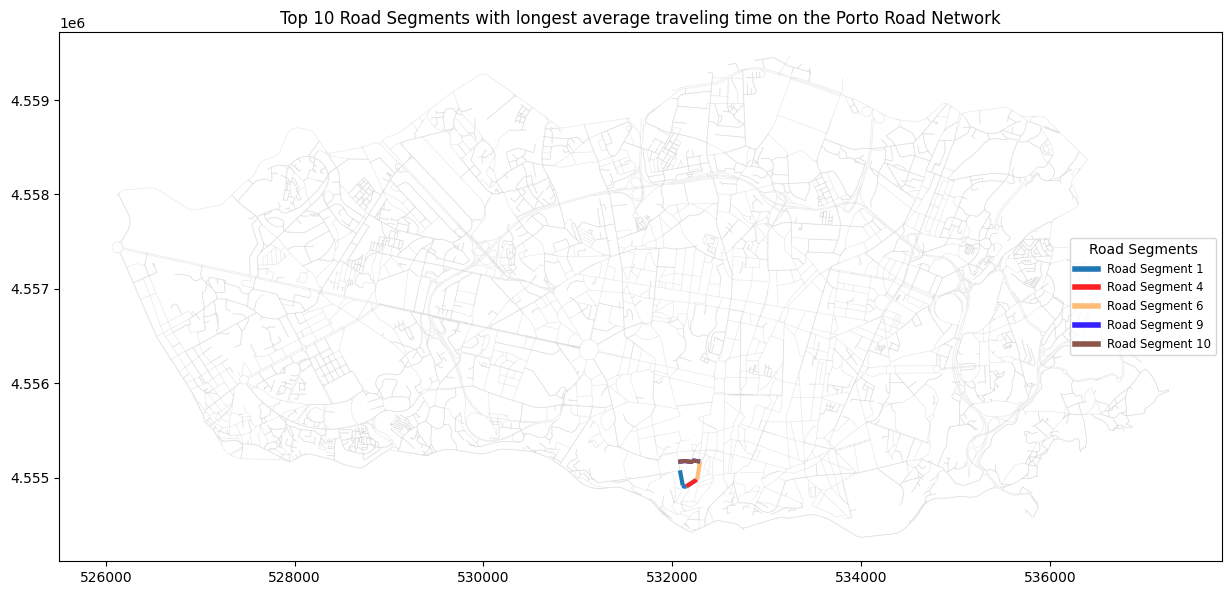

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b'
]

segment_group_list1 =[[14326493], [14326493], [14326493], [697598025, 14326493, 211436103], [697598025, 14326493, 211436103], [1173961990, 434857293, 215301977, 763524507, 763524508, 859079005], [1173961990, 434857293, 215301977, 763524507, 763524508, 859079005], [1173961990, 434857293, 215301977, 763524507, 763524508, 859079005], [216969809], [216969809, 763524498, 258853579, 258853580], [216969809, 763524498, 258853579, 258853580], [233006425, 28193881, 200967938], [1188987808, 1085592954], [233098267], [1206667334], [595164143], [8367073], [34683151], [1174863227], [1174863227], [128246659], [128133836], [434882601], [434882601], [434882601], [453493822], [453493822], [453493822], [453493822], [453493822], [453493822], [453493822], [453493822], [453493822]]
#segment_group_list1 = [[859507145], [12543986]]
def plot_top_duration_road_segments_check(gdf_network, osmids_to_visualize):
    legend_handles = []
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network (light gray for background)
    gdf_network.plot(ax=ax, linewidth=0.5, color='lightgray', alpha=0.5)

    # Loop through the osmids_to_visualize list and plot each road segment
    for i, segment_list in enumerate(osmids_to_visualize[:10]):  # Limit to first 10
        # For each road segment in the segment list, treat as one road segment
        osmid_combined = tuple(segment_list)  # Combine OSM IDs into a tuple

        # Check if segment has already been plotted (to avoid adding it again)
        if osmid_combined not in [handle[0] for handle in legend_handles]:
            # Filter the road network by the current OSM ID
            road_segment = gdf_network[gdf_network['osmid'].apply(lambda x: set(segment_list).issubset(x) if isinstance(x, list) else x == segment_list[0])]

            if not road_segment.empty:
                # Plot the road segment with the selected color
                road_segment.plot(ax=ax, color=custom_colors[i], linewidth=3, label=f'Road Segment {i + 1}')

                # Add a dummy legend handle only once
                legend_handles.append((osmid_combined, plt.Line2D([0], [0], color=custom_colors[i], lw=4, label=f'Road Segment {i + 1}')))

    # Customize the plot with the legend and title
    plt.legend(handles=[handle[1] for handle in legend_handles], title="Road Segments", loc='center right', fontsize='small', ncol=1)
    plt.title("Top 10 Road Segments with longest average traveling time on the Porto Road Network")
    plt.show()
# Assuming gdf_network is the GeoDataFrame containing the road network
road_network = ox.graph_from_place("Porto, Portugal", network_type="drive")
gdf_network = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
gdf_network = reproject_to_meters(gdf_network)
#segment_counts_average_duration = segment_statistics_df['SEGMENT_ID'].tolist()[:10]

# Run the function to visualize the top road segments
plot_top_duration_road_segments_check(gdf_network, segment_group_list1)


In [15]:
import pandas as pd
import folium
from IPython.display import IFrame


# Plotting function with outlier removal
def plot_segments_for_trip_id(snapped_gps_data, trip_id, indices_to_remove=None, remove_outliers=False):
    """
    Creates an interactive map for a specific TRIP_ID using lat and lon points.

    Args:
        snapped_gps_data (pd.DataFrame): DataFrame containing lat, lon, and TRIP_ID columns.
        trip_id (int): The TRIP_ID to visualize.
        indices_to_remove (list, optional): List of indices to remove before plotting.
        remove_outliers (bool, optional): Whether to exclude points marked as outliers.

    Returns:
        folium.Map: Interactive map with plotted trip segments.
    """
    # Filter for the specified TRIP_ID
    trip_data = snapped_gps_data[snapped_gps_data['TRIP_ID'] == trip_id].reset_index(drop=True)

    if trip_data.empty:
        print(f"No data found for TRIP_ID: {trip_id}")
        return None

    # Optionally remove outliers
    if remove_outliers:
        trip_data = trip_data[trip_data['Is it an outlier'] != 'Outlier'].reset_index(drop=True)

    # Remove points based on the provided indices, if any
    if indices_to_remove is not None:
        print(f"Removing points at indices: {indices_to_remove}")
        trip_data = trip_data.drop(indices_to_remove).reset_index(drop=True)

    # Print debug information
    print(f"Data found for TRIP_ID {trip_id} after processing: {trip_data.shape[0]} points")

    # Center the map on the mean latitude and longitude
    map_center = [trip_data['lat'].mean(), trip_data['lon'].mean()]
    m = folium.Map(location=map_center, zoom_start=14)

    # Plot the entire trip as one continuous line
    folium.PolyLine(
        locations=[(row['lat'], row['lon']) for _, row in trip_data.iterrows()],
        color="blue",
        weight=5,
        opacity=0.7,
        tooltip=f"TRIP_ID: {trip_id}"
    ).add_to(m)

    # Add markers for each point along the trip
    for index, row in trip_data.iterrows():
        folium.CircleMarker(
            location=(row['lat'], row['lon']),
            radius=3,
            color="red",
            fill=True,
            fill_color="red",
            popup=f"Index: {index}, Adjacent Distance: {row['Adjacent Distance']}",
            tooltip=f"Index: {index}"  # Tooltip with index for quick view
        ).add_to(m)

    return m

In [16]:
# Replace with the TRIP_ID you want to visualize
trip_id = 1372637299620000011      # Example TRIP_ID, replace with an actual ID from your dataset

# Generate the map with outlier removal enabled
interactive_map = plot_segments_for_trip_id(gps_data_with_outliers, trip_id, remove_outliers=False)

if interactive_map:
    # Save and display the map
    interactive_map.save("1372637299620000011_outliers.html")
    display(IFrame("trip_segments_map.html", width=1000, height=500))

Data found for TRIP_ID 1372637299620000011 after processing: 34 points


Filtered trips with 'Not outlier': 71697
Mapped Routes CRS: EPSG:32629
Number of routes created: 1


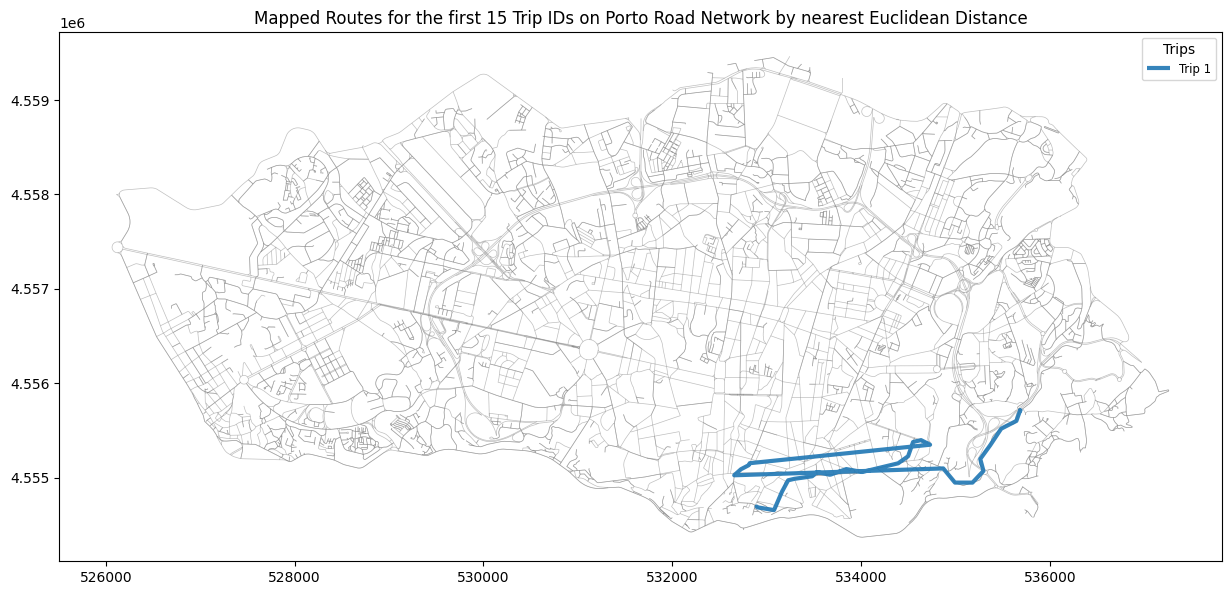

In [ ]:
_import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Custom colors for the trips
custom_colors = [
    '#1f77b4', '#ff7f0e', '#ea3690', '#FF2121', '#e377c2',
    '#ffbb78', '#9467bd', '#e2653e', '#3621FF', '#8c564b',
    '#17becf', '#34ec5B', '#EC3BFF', '#bcbd22', '#2ca02c'
]

# List of the 15 trip IDs you want to visualize
tripids = [
    1372636854620000520
]

# Step 1: Create LineStrings for each trip
def create_mapped_routes(filtered_data):
    routes = []

    # Filter the snapped data to include only 'Is it an outlier' == 'Not outlier'

    # Filter to include only the specified trip IDs
    unique_trip_ids = filtered_data[filtered_data['TRIP_ID'].isin(tripids)]['TRIP_ID'].unique()

    print(f"Filtered trips with 'Not outlier': {len(filtered_data)}")  # Debugging line

    # Group snapped points by TRIP_ID
    for trip_id, group in filtered_data.groupby('TRIP_ID'):
        if trip_id in unique_trip_ids:
            # Create a LineString from the snapped points
            snapped_points = list(group['snapped'])
            if len(snapped_points) > 1:  # Only create a route if there are multiple points
                route = LineString(snapped_points)
                routes.append({'TRIP_ID': trip_id, 'geometry': route})

    # Convert to GeoDataFrame
    mapped_routes = gpd.GeoDataFrame(routes, crs="EPSG:32629")

    # Check the CRS and ensure the data is valid
    print(f"Mapped Routes CRS: {mapped_routes.crs}")  # Debugging line
    print(f"Number of routes created: {len(mapped_routes)}")  # Debugging line

    return mapped_routes

# Create mapped routes GeoDataFrame for the specified trips (non-outliers only)
mapped_routes = create_mapped_routes(gps_data_with_nearest_osmid_euDist)

# Step 2: Order the mapped routes based on the provided trip_ids
mapped_routes['TRIP_ID'] = pd.Categorical(mapped_routes['TRIP_ID'], categories=tripids, ordered=True)
mapped_routes = mapped_routes.sort_values('TRIP_ID')

# Step 3: Plot Mapped Routes with Distinct Colors
def plot_colored_mapped_routes(mapped_routes, road_network,titlestring):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the road network
    road_network.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

    # Create legend handles to map each color to the corresponding trip ID
    legend_handles = []

    for i, trip_id in enumerate(mapped_routes['TRIP_ID'].unique()):
        route = mapped_routes[mapped_routes['TRIP_ID'] == trip_id]
        route_color = custom_colors[i]  # Get the color corresponding to the trip_id

        if not route.empty:
            # Plot the route with the assigned color
            route.plot(ax=ax, color=route_color, linewidth=3, alpha=0.9, label=f'Trip {i + 1}')

            # Create a dummy handle for the legend (to add the trip label with its color)
            legend_handles.append(plt.Line2D([0], [0], color=route_color, lw=4, label=f'Trip {i + 1}'))

    # Customize plot
    plt.legend(title="Trips", loc='upper right', fontsize='small', ncol=2)
    plt.title("Mapped Routes for the first 15 Trip IDs on Porto Road Network "+titlestring)
    plt.show()

# Run the function to visualize routes by trip with distinct colors
plot_colored_mapped_routes(mapped_routes, gdf_network,'by nearest Euclidean Distance')
